In [ ]:
import numpy as np
import math
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import scipy.integrate as integrate

# Discrete Random Variables

For discreet random variable, the mean or the expected value is defined as:

\begin{align}
μ = E(x) = ∑x.p(x)
\end{align}

and variance is given by:

\begin{align}
σ^2 = Var(x) = ∑(x-μ)^2.p(x)
\end{align}

The mean and variance of the discreet variable x whose probability distribution is given by:

x = [-1, 0, 1, 4] \\
P(x) = [0.2, 0.5, 0.2, 0.1]

In [ ]:
def discrete_mean(points, probabilities):
    mean = 0
    # Loop through each point and its corresponding probability
    for x, p in zip(points, probabilities):
        mean += x * p
    return mean

def discrete_variance(points, probabilities):
    mean = discrete_mean(points, probabilities)
    variance = 0
    # For each point, add the weighted squared difference from the mean
    for x, p in zip(points, probabilities):
        variance += p * (x - mean)**2
    return variance

if __name__ == "__main__":
    points = [-1, 0, 1, 4]
    probabilities = [0.2, 0.5, 0.2, 0.1]
    
    mean = discrete_mean(points, probabilities)
    variance = discrete_variance(points, probabilities)
    
    print("The mean is ", mean, " and the variance is ", variance)
    

The mean is  0.4  and the variance is  1.8400000000000003


## Bernoulli's Distribution

### Bayesian estimates and Maximum Likelihood estimates calculation

The maximum likelihood estimate can be calculated by:

\begin{align}
μ_{MLE} = \frac{m}{N}, \quad where \quad m =  &\sum_{i=0}^N x_i  
\end{align}

The Bayesian estimate is given by:

\begin{align}
μ_{Bayesian} = \frac{(a+m)}{a + b + N}, \quad where \quad m =  &\sum_{i=0}^N x_i \quad \text{and a and b reflect the initial information about the distribution}
\end{align}

In a coin toss we are running 100 simulations and we have prior knowledge that in the prior beta distribution, left parameter a is 6 and right parameter b is 10. We calculate  the MLE and Bayesian estimates 

In [11]:
from scipy.stats import bernoulli

def bernoulli_distribution():
    p = 0.5
    X = bernoulli(p)
    return X

def compare_estimates(N):
    ## Extracting the number of required samples from the distribution
    X = bernoulli_distribution()
    X_samples = X.rvs(N)

    ## Write your code here and return the value of the estimates
    maximum_likelihood_estimate = np.mean(X_samples)
    a=6
    b=10
    bayesian_estimate = (a + np.sum(X_samples)) / (a+b+N)

    return bayesian_estimate, maximum_likelihood_estimate

if __name__ == "__main__":
    bayesian_estimate, maximum_likelihood_estimate = compare_estimates(100)
    print("Bayesian Estimate =", bayesian_estimate)
    print("Maximum Likelihood Estimate =", maximum_likelihood_estimate)

Bayesian Estimate = 0.5
Maximum Likelihood Estimate = 0.52


# Continuous Variables

Given a probability density function, we calculate mean or the expected value as:

\begin{align}
   E(X)  \quad or  \quad \text{μ = } &\int_{-\infty}^{+\infty}  x.f(x) \mathrm{d}x \ \\[1em]
\end{align}

and the varince is calculated as:

\begin{align}
Var(X) = E(X^2) - μ^2
\end{align}


\begin{align}
\text{E(\(X^2\)) = } &\int_{-\infty}^{+\infty}  x^2.f(x) \mathrm{d}x \ \\[1em]
\end{align}

Given a continuous random variable x, the probability density function is defined as:

\begin{align}
        \text{f}(x) = \left\{
        \begin{array}{cl}
        \frac{sinx}{2} & 0 \le x \le \pi \\
        0 & elsewhere
        \end{array}
        \right.
    \end{align}

Refer [this](https://www.tutorialspoint.com/scipy/scipy_integrate.htm#:~:text=The%20quad%20function%20returns%20the,in%20the%20value%20of%20integral.) article for more info on integrate.quad function.

In [ ]:
import scipy.integrate as integrate
import math

def f(x):
    #PDF is .5 sin(x) for x in [0,pi]
    return 0.5 * math.sin(x)

def continuous_mean():
    mean, _ = integrate.quad(lambda x: x * f(x), 0, math.pi)
    return mean

def continuous_variance():
    Ex2, _ = integrate.quad(lambda x: x**2 * f(x), 0, math.pi)
    mean = continuous_mean()
    variance = Ex2 - mean**2
    return variance

if __name__ == "__main__":
    mean = continuous_mean()
    variance = continuous_variance()

    print("The mean is ", mean, " and the variance is ", variance)

The mean is  1.5707963267948966  and the variance is  0.46740110027233994


## Central Limit Theorem

Take a large dataset of random variables, for eg: N = 10000. Using numpy library form a set of random numbers of size N. This will be your population size. Then take a sample size which will be a random subset of the population size. Iterate the loop for the number of times as population and calculate the mean for the extracted sample and store it in an array. 

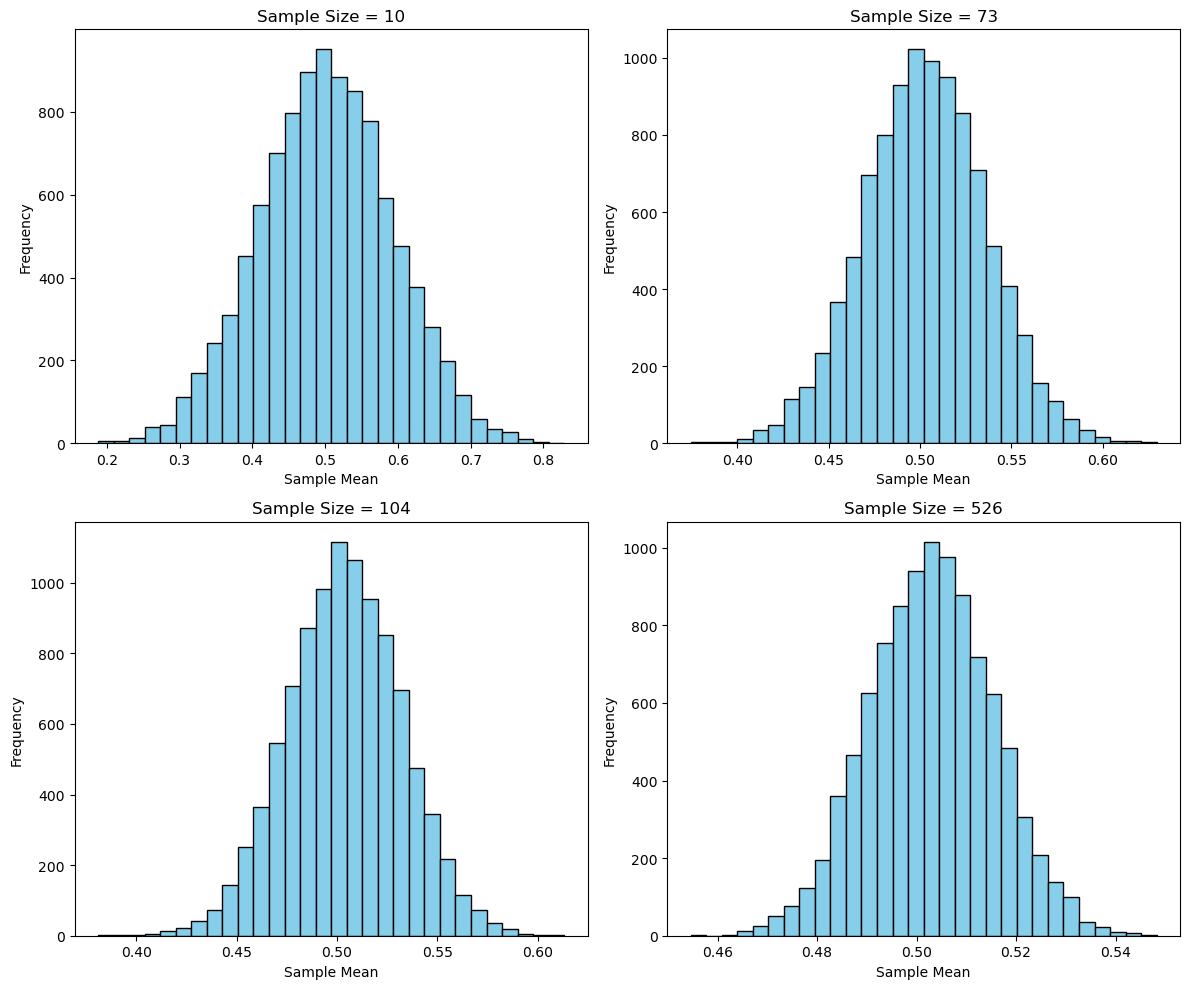

In [13]:
N = 10000
#population of random numbers from a uniform distribution over [0, 1]
population = np.random.rand(N)

# Define different sample sizes to test
sample_sizes = [10, 73, 104, 526]

# Prepare a 2x2 subplot figure to compare histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, sample_size in enumerate(sample_sizes):
    sample_means = [] 
    
    # For iterations take a random sample and compute its mean
    for i in range(N):
        sample = np.random.choice(population, size=sample_size, replace=True)
        sample_means.append(np.mean(sample))
    
    #Histogram sample means for the current sample size
    axes[idx].hist(sample_means, bins=30, color='skyblue', edgecolor='black')
    axes[idx].set_title(f'Sample Size = {sample_size}')
    axes[idx].set_xlabel('Sample Mean')
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
